<a href="https://colab.research.google.com/github/Sofia-dsc/Repo-Procesamiento-del-habla/blob/main/Desafio_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DESAFIO CLASIFICACION**

### **Alumna:** Sofía Roldán Varela

Actividades

1) Deberá elegir un dataset no trabajado en clases para clasificación

2) Elija un dataset para tarea de clasificación entre los siguientes: https://archive.ics.uci.edu/datasets?Task=Classification&skip=0&take=10&sort=desc&orderBy=NumHits&search=

3) No podrá repetir o utilizar el mismo dataset que algún otro estudiante. Para ello debe postear en este grupo cual es su dataset elegido. Una vez elegido no podrá cambiarlo.

4) Debe postear aquí como entrega el enlace a su notebook colab público, también almacenado en su github.

5) En su notebook debe tener como mínimo los siguientes apartados:

5.1 Presentación del dataset

5.2 Pre-procesamiento del dataset

5.3 Explicación del objetivo (qué es lo que se quiere clasificar, si es binaria o no, cuáles son las clases, etc)

5.4 Elección de modelos de clasificación a entrenar (minimo dos modelos, y uno de ellos debe entrenarlo con diferentes hiperparámetros para mostrar su desempeño)

5.4 División del dataset para entrenar (set de entrenamiento, testeo, si usará o no cross validation)

5.5 Entrenamiento de los modelos

5.6 Resultados obtenidos y su análisis (contrastar métricas, matriz de confusión)

5.7 Análisis de la experiencia, elección de modelo candidato

# **Presentación del Dataset y Objetivo**

### Mi dataset elegido es sobre Clasificación de correos electrónicos como Spam o No Spam.
### Las instancias en este conjunto de datos representan correos electrónicos, la tarea de clasificación es determinar si un correo electrónico dado es spam o no.

### La última columna del archivo spambase.data indica si el correo electrónico fue considerado spam (1) o no (0), es decir, correo electrónico comercial no solicitado. La mayoría de los atributos indican si una palabra o carácter en particular apareció frecuentemente en el correo electrónico.

# **Preprocesamiento**
### Comienzo transformando mis datos a un dataframe

In [14]:
import pandas as pd

# Defino la ruta del archivo
archivo = 'spambase.data'

# Convierto el archivo separado por comas en un dataframe
df = pd.read_csv(archivo, header=None) # El archivo spam.data no tiene encabezados, header=none garantiza que se leerán todos los datos correctamente

# Muestro las primeras filas del DataFrame
print(df.head(10))

     0     1     2    3     4     5     6     7     8     9   ...    48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
5  0.00  0.00  0.00  0.0  1.85  0.00  0.00  1.85  0.00  0.00  ...  0.00   
6  0.00  0.00  0.00  0.0  1.92  0.00  0.00  0.00  0.00  0.64  ...  0.00   
7  0.00  0.00  0.00  0.0  1.88  0.00  0.00  1.88  0.00  0.00  ...  0.00   
8  0.15  0.00  0.46  0.0  0.61  0.00  0.30  0.00  0.92  0.76  ...  0.00   
9  0.06  0.12  0.77  0.0  0.19  0.32  0.38  0.00  0.06  0.00  ...  0.04   

      49   50     51     52     53     54   55    56  57  
0  0.000  0.0  0.778  0.000  0.000  3.756   61   278   1  
1  0.132  0.0  0.372  0.180  0.048  5.114  101  1028   1

### Le asigno los nombres a las columnas manualmente según la información del sitio del dataset

In [15]:
# Nombres de las columnas según la descripción del archivo
columnas = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
            'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
            'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses',
            'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
            'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl',
            'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857',
            'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
            'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
            'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(',
            'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average',
            'capital_run_length_longest', 'capital_run_length_total', 'spam']

# Asigno los nombres de columna al DataFrame
df.columns = columnas

# Muestro las primeras filas del DataFrame con nombres
print(df.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

## **Modelo 1**
### Al trabajar con clasificación binaria, como primer modelo voy a utilizar **Logistic regression** (Regresión Logística)

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# Cargo mis variables "x" e "y"
X = df.drop('spam', axis=1)  # Cargo todas las columnas excepto la columna 'spam' que es la variable objetivo
y = df['spam']  # Cargo la variable objetivo 'spam'

# Divido el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.26, random_state=42)

# Muestro el tamaño de los conjuntos
print(f"Conjunto de entrenamiento: {len(X_train)} ({(len(X_train) / len(X)) * 100:.2f}%)")
print(f"Conjunto de validación: {len(X_test)} ({(len(X_test) / len(X)) * 100:.2f}%)")

Conjunto de entrenamiento: 3404 (73.98%)
Conjunto de validación: 1197 (26.02%)


In [22]:
# Creo el modelo de Regresión Logística
logreg = LogisticRegression(max_iter=1000)  # max_iter para evitar advertencias de convergencia

In [24]:
# Entreno el modelo con mis conjuntos de entrenamiento y evaluacion
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [27]:
# Realizo las predicciones
y_pred = logreg.predict(X_test)

# Evaluo el modelo con la métrica accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Hago reporte de clasificación (métricas como precisión, recall, F1-score)
print("\nReporte de clasificación:")
print (classification_report(y_test, y_pred))

# Genero la matriz de confusión
matrix = confusion_matrix(y_test, y_pred)

Accuracy: 0.9240

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       701
           1       0.94      0.88      0.91       496

    accuracy                           0.92      1197
   macro avg       0.93      0.92      0.92      1197
weighted avg       0.92      0.92      0.92      1197



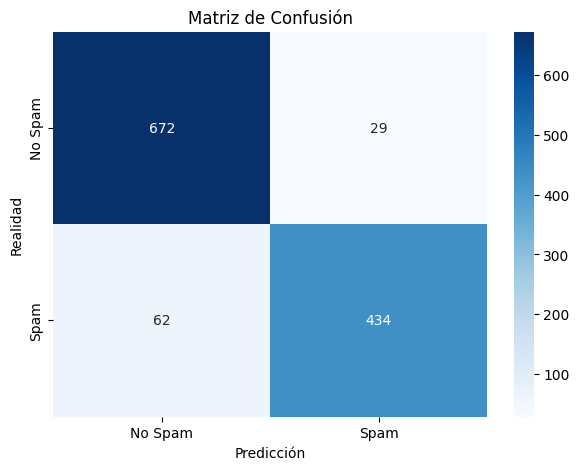

In [30]:
# Grafico mi matriz de confusión
plt.figure(figsize=(7, 5))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Spam", "Spam"], yticklabels=["No Spam", "Spam"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.show()

Esta matriz muestra **672 Verdareros negativos (TN):** Los correos que son No Spam (en realidad no son spam) y que el modelo ha clasificado correctamente como No Spam.

**29 Falsos positivos (FP):** Los correos que son No Spam pero que el modelo ha clasificado incorrectamente como Spam.

**62 Falsos negativos (FN):** Los correos que son Spam pero que el modelo ha clasificado incorrectamente como No Spam.

**434 Verdaderos positivos (TP):** Los correos que son Spam (en realidad son spam) y que el modelo ha clasificado correctamente como Spam.

Podemos deducir que el modelo es bueno.

## **Modelo 2**
### Para el segundo modelo voy a trabajar con un **Arbol de decisión**. Para este modelo voy a establecer otros parametros en los conjuntos de entrenamiento y testeo, y utilizaré los siguientes hiperparametros
### **max_depth:** Limita la profundidad del árbol.
### **min_samples_split:** El número mínimo de muestras necesarias para dividir un nodo.
### **min_samples_leaf:** El número mínimo de muestras necesarias en un nodo hoja.

### --> En mi modelo:
### **max_depth:** profundidad de 6
### **min_samples_split:** 10 muestras
### **min_samples_leaf:** 5 muestras

### **Preprocesamiento**

In [39]:
# Cargo las variables "x" e "y"
X_2 = df.drop('spam', axis=1)  # Cargo todas las columnas excepto la columna 'spam' que es la variable objetivo
y_2 = df['spam']  # Cargo la variable objetivo 'spam'

# Divido el dataset en entrenamiento y prueba
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.35, random_state=42)

# Muestro el tamaño de los conjuntos
print(f"Conjunto de entrenamiento: {len(X_train_2)} ({(len(X_train_2) / len(X_2)) * 100:.2f}%)")
print(f"Conjunto de validación: {len(X_test_2)} ({(len(X_test_2) / len(X_2)) * 100:.2f}%)")

Conjunto de entrenamiento: 2990 (64.99%)
Conjunto de validación: 1611 (35.01%)


### **Creación del modelo de Árbol de Decisión**

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [42]:
# Creo el modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42, max_depth=6, min_samples_split=10, min_samples_leaf=5)

# Entreno el modelo con los nuevos sets de entrenamiento
tree_model.fit(X_train_2, y_train_2)

# Realizo las predicciones en el nuevo conjunto de prueba
y_pred_tree = tree_model.predict(X_test_2)

In [43]:
# Evaluo el modelo con los nuevos parámetros
accuracy_tree = accuracy_score(y_test_2, y_pred_tree)
print(f"Precisión con ajustes de hiperparámetros: {accuracy_tree:.4f}")

# Genero la matriz de confusión
matrix_tree = confusion_matrix(y_test_2, y_pred_tree)

Precisión con ajustes de hiperparámetros: 0.9156


In [47]:
# Hago reporte de clasificación (métricas como precisión, recall, F1-score)
print("\nReporte de clasificación:")
print (classification_report(y_test_2, y_pred_tree))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       948
           1       0.93      0.86      0.89       663

    accuracy                           0.92      1611
   macro avg       0.92      0.91      0.91      1611
weighted avg       0.92      0.92      0.91      1611



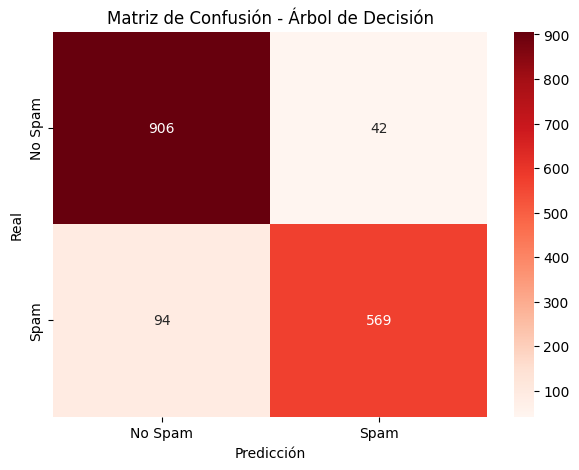

In [46]:
# Visualizo la matriz de confusión del segundo modelo
plt.figure(figsize=(7, 5))
sns.heatmap(matrix_tree, annot=True, fmt='d', cmap='Reds', xticklabels=['No Spam', 'Spam'], yticklabels=['No Spam', 'Spam'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.show()

Esta matriz muestra **906 Verdareros negativos (TN):** Los correos que son No Spam (en realidad no son spam) y que el modelo ha clasificado correctamente como No Spam.

**42 Falsos positivos (FP):** Los correos que son No Spam pero que el modelo ha clasificado incorrectamente como Spam.

**94 Falsos negativos (FN):** Los correos que son Spam pero que el modelo ha clasificado incorrectamente como No Spam.

**569 Verdaderos positivos (TP):** Los correos que son Spam (en realidad son spam) y que el modelo ha clasificado correctamente como Spam.

Podemos deducir que este modelo también es bueno.

# ***Conclusión***
## Análisis de resultado del modelo 1 (Regresión Logística):

Accuracy: 0.9240

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       701
           1       0.94      0.88      0.91       496

    accuracy                           0.92      1197
   macro avg       0.93      0.92      0.92      1197
weighted avg       0.92      0.92      0.92      1197

### Este modelo muestra una exactitud del 92%, lo que significa que el modelo acierta en el 92% de las predicciones realizadas.

### La precisión de 0.92 indica que el 92% de las veces que el modelo predice "No Spam", realmente es "No Spam".

### El recall de 0.96 muestra que el modelo tiene una alta capacidad para identificar correctamente los correos legítimos, con un 96% de los correos "No Spam" correctamente identificados.

### El F1-score de 0.94 indica un buen balance entre precisión y recall.


## Análisis de resultado del modelo 2 (Arbol de decisión):
Precisión con ajustes de hiperparámetros: 0.9156

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       948
           1       0.93      0.86      0.89       663

    accuracy                           0.92      1611
   macro avg       0.92      0.91      0.91      1611
weighted avg       0.92      0.92      0.91      1611

### El segundo modelo muestra una exactitud del 91% indicando que el modelo es bastante competente para clasificar correctamente.

### Al igual que en el modelo de regresión logística, el modelo de árbol de decisión tiene una alta precisión y recall para la clase "No Spam", aunque la precisión es un poco más baja (0.91 frente a 0.92). Esto significa que hay una pequeña cantidad de correos "No Spam" clasificados incorrectamente como "Spam", pero sigue siendo un buen rendimiento. El recall de 0.96 sigue mostrando que el modelo identifica muy bien los correos "No Spam".

## En resumen

### Ambos modelos muestran precisiones altas. Pero el segundo modelo de árbol de decisión es un poco más baja que la del modelo de regresión logística (91.56% frente a 92.40%), por ende, el modelo electo sería el segundo: **Regresión logística**

Para realizar este trabajo me ayudé de los siguientes sitios

Documentación oficial de Scikit-learn sobre matrices de confusión: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

Artículo explicativo sobre matrices de confusión y métricas: https://www.analyticsvidhya.com/blog/2020/06/understanding-confusion-matrix-in-machine-learning/

Guía práctica sobre métricas de clasificación (precision, recall, F1, etc.): https://towardsdatascience.com/understanding-classification-metrics-5b86becc3ed0